# **Import required libraries**

In [ ]:
import pandas
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.layers import Input, Dropout

from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
# Reads .csv file as DataFrame.
dataset = pd.read_csv("/content/diabetes.csv",header=None).values

In [ ]:
print(type(dataset))
print(dataset.shape)



<class 'numpy.ndarray'>
(768, 9)


# **Split data into test and train**

In [ ]:
X = dataset[:,0:8]
y = dataset[:,8]

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.25, random_state=22)

print("X_train.shape: ", X_train.shape)
print("Y_train.shape: ", Y_train.shape)
print("X_test.shape: ", X_test.shape)
print("Y_test.shape: ", Y_test.shape)

X_train.shape:  (576, 8)
Y_train.shape:  (576,)
X_test.shape:  (192, 8)
Y_test.shape:  (192,)


# **Existing model provided in the usecase**

In [ ]:
my_first_nn = Sequential() # create a Sequential model

my_first_nn.add(Input(shape=(8,))) # Input Layer

my_first_nn.add(Dense(32, activation='relu')) # hidden layer

my_first_nn.add(Dense(1, activation='sigmoid')) # output layer 

my_first_nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

print(my_first_nn.summary())

# The returned history object holds a record of the loss values and metric values during training
history =  my_first_nn_fitted = my_first_nn.fit(X_train, Y_train, epochs=100, verbose=1, shuffle=True)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 32)                288       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 33        
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/100
18/18 [==============================] - 0s 1ms/step - loss: 11.0660 - acc: 0.6128
Epoch 2/100
18/18 [==============================] - 0s 1ms/step - loss: 5.1352 - acc: 0.5486
Epoch 3/100
18/18 [==============================] - 0s 1ms/step - loss: 2.4195 - acc: 0.4583
Epoch 4/100
18/18 [==============================] - 0s 1ms/step - loss: 1.7267 - acc: 0.5469
Epoch 5/100
18/18 [==============================] - 0s 2ms/step - loss: 1.5163 - acc: 0.5660
Epoch 6/100
18/18 [=======================

# **Accuracy of the first model**

In [ ]:
print(my_first_nn.summary())

loss, accuracy = my_first_nn.evaluate(X_test, Y_test, verbose=0)

print("\nModel 1 Accuracy: ", accuracy)
print("Model 1 Loss: ", loss)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 32)                288       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 33        
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________
None

Model 1 Accuracy:  0.7083333134651184
Model 1 Loss:  0.6141995787620544


# **Add more Dense layers to the existing code and check accuracy**



In [ ]:
my_second_nn = Sequential() # create a Sequential model

my_second_nn.add(Input(shape=(8,))) # Input Layer

my_second_nn.add(Dense(32, activation='relu')) # hidden layer

my_second_nn.add(Dense(64, activation='relu')) # hidden layer


my_second_nn.add(Dense(1, activation='sigmoid')) # output layer 

my_second_nn.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

print(my_second_nn.summary())



Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 32)                288       
_________________________________________________________________
dense_8 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 65        
Total params: 2,465
Trainable params: 2,465
Non-trainable params: 0
_________________________________________________________________
None


# **Add the validation_data=(X_test, Y_test) attribute to .fit() method**

In [ ]:
# The returned history object holds a record of the loss values and metric values during training
history =  my_second_nn_fitted = my_second_nn.fit(X_train, Y_train, validation_data=(X_test, Y_test),epochs=100, verbose=1, shuffle=True)

Epoch 1/100
18/18 [==============================] - 1s 11ms/step - loss: 4.7575 - acc: 0.5990 - val_loss: 2.1947 - val_acc: 0.5312
Epoch 2/100
18/18 [==============================] - 0s 4ms/step - loss: 1.4252 - acc: 0.6285 - val_loss: 0.9378 - val_acc: 0.6198
Epoch 3/100
18/18 [==============================] - 0s 3ms/step - loss: 0.8190 - acc: 0.6458 - val_loss: 0.9675 - val_acc: 0.5260
Epoch 4/100
18/18 [==============================] - 0s 3ms/step - loss: 0.7381 - acc: 0.6510 - val_loss: 0.7423 - val_acc: 0.6354
Epoch 5/100
18/18 [==============================] - 0s 4ms/step - loss: 0.6871 - acc: 0.6719 - val_loss: 0.7281 - val_acc: 0.6354
Epoch 6/100
18/18 [==============================] - 0s 4ms/step - loss: 0.7260 - acc: 0.6580 - val_loss: 0.8212 - val_acc: 0.6094
Epoch 7/100
18/18 [==============================] - 0s 3ms/step - loss: 0.7363 - acc: 0.6667 - val_loss: 0.8252 - val_acc: 0.6875
Epoch 8/100
18/18 [==============================] - 0s 3ms/step - loss: 0.6550 - 

# **Accuracy of the second model after adding more dense**

In [ ]:
loss, accuracy = my_second_nn.evaluate(X_test, Y_test, verbose=0)

print("\nsecond Model Accuracy with added dense layers: ", accuracy)
print("second model Loss with added dense layers: ", loss)


second Model Accuracy with added dense layers:  0.671875
second model Loss with added dense layers:  0.635578453540802


# **Plot the accuracy for training and validation in the same plot**

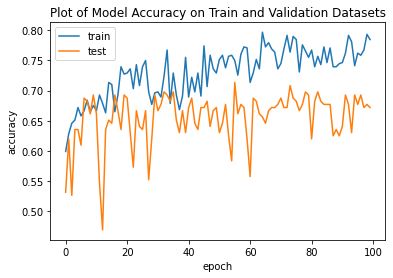

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Plot of Model Accuracy on Train and Validation Datasets')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# **Normalize the data before feeding the data to the model**

In [ ]:
from sklearn.preprocessing import StandardScaler 

sc = StandardScaler()

X_scaled = sc.fit_transform(X)
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=22)

# **Fit the model with scaled data**

In [ ]:
# The returned history object holds a record of the loss values and metric values during training
my_second_nn_fitted = my_second_nn.fit(X_train, Y_train, epochs=100, verbose=1, shuffle=True)

Epoch 1/100
18/18 [==============================] - 0s 2ms/step - loss: 0.7120 - acc: 0.6528
Epoch 2/100
18/18 [==============================] - 0s 2ms/step - loss: 0.6066 - acc: 0.6684
Epoch 3/100
18/18 [==============================] - 0s 2ms/step - loss: 0.5270 - acc: 0.7257
Epoch 4/100
18/18 [==============================] - 0s 2ms/step - loss: 0.4927 - acc: 0.7604
Epoch 5/100
18/18 [==============================] - 0s 2ms/step - loss: 0.4733 - acc: 0.7795
Epoch 6/100
18/18 [==============================] - 0s 2ms/step - loss: 0.4662 - acc: 0.7830
Epoch 7/100
18/18 [==============================] - 0s 2ms/step - loss: 0.4593 - acc: 0.7865
Epoch 8/100
18/18 [==============================] - 0s 2ms/step - loss: 0.4544 - acc: 0.7778
Epoch 9/100
18/18 [==============================] - 0s 2ms/step - loss: 0.4468 - acc: 0.7865
Epoch 10/100
18/18 [==============================] - 0s 2ms/step - loss: 0.4431 - acc: 0.7934
Epoch 11/100
18/18 [==============================] - 0s 2m

# **Accuracy of the model 3 with normalized data**

In [ ]:

loss, accuracy = my_second_nn.evaluate(X_test, Y_test, verbose=0)

print("\nsecond Model  Accuracy after data normalization: ", accuracy)
print("second Model  Loss after data normalization: ", loss)


second Model  Accuracy after data normalization:  0.75
second Model  Loss after data normalization:  0.531062662601471


# **Summary:**

In the part 1 we used diabetes dataset. First, we trained model using 32 units of hidden dense layer neurons  and trained data, tested data and got accuracy of:

**Model 1 Accuracy:  0.7083333134651184**

**Model 1 Loss:  0.6141995787620544**

Second, Added more dense layer of 64 units, trained data. Tested data by passing vaidatation X_test and y-test and got accuracy of :

**second Model Accuracy with added dense layers:  0.671875**

**second model Loss with added dense layers:  0.635578453540802**

Accuracy got decreased after adding extra dense layer. Loss percentage increased.

Third, we normalized data using standardscalar() and tested on second model architecture and predicted test accuracy :

**second Model  Accuracy after data normalization:  0.75**

**second Model  Loss after data normalization:  0.531062662601471**

After normalizing data accuracy we got increased and loss percentage decreased.